In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
# load plotly
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cpi = pd.read_csv('data/CPIAUCSL.csv')
cpi['DATE'] = pd.to_datetime(cpi['DATE'])

gold = pd.read_csv('data/gold_daily_prices.csv')
gold['Date'] = pd.to_datetime(gold['Date'])
# sample gold prices to monthly
gold_monthly = gold.set_index('Date').resample('M').last()

<AxesSubplot:>

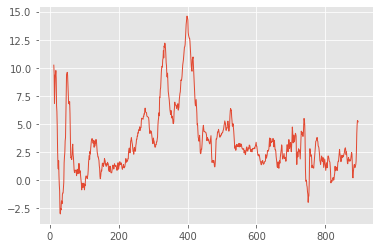

In [3]:
# compute year to year percent change
cpi['yoy'] = (cpi['CPIAUCSL'] - cpi['CPIAUCSL'].shift(12)) / cpi['CPIAUCSL'].shift(12) * 100
cpi['yoy'] = cpi['yoy'].round(2)
cpi.yoy.plot()

/home/mm/apps/miniconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


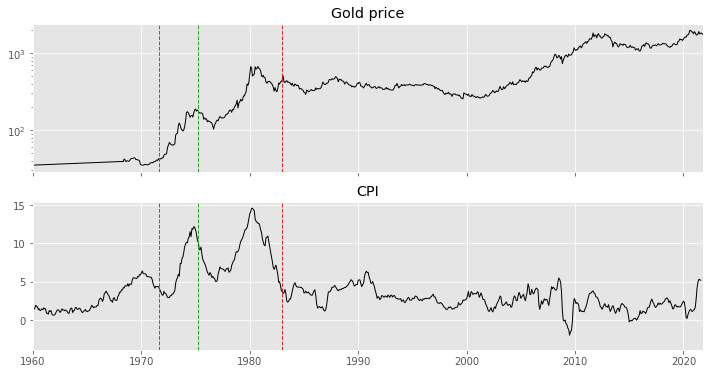

<Figure size 720x432 with 0 Axes>

In [9]:
# create 2 vertical subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

# set figure size
fig = plt.figure(figsize=(10,6))
ax1.plot(gold_monthly.index, gold_monthly['Closing Value'], color='k')
# plot vertical line for 1983 Jan 1
ax1.axvline(pd.to_datetime('1983-01-01'), color='tab:red', linestyle='--')
# plot vertical line for 1971 Aug 15
ax1.axvline(pd.to_datetime('1971-08-15'), color='tab:blue', linestyle='--')
ax1.plot([pd.to_datetime('1960-01-01'), gold_monthly.index[0]], [35, gold_monthly.values[0]], color='k')
# set log scale for ax1
ax1.set_yscale('log')

ax2.plot(cpi.DATE, cpi.yoy, color='k')
# set x-axis to start from gold.Date.min()
ax2.set_xlim(pd.to_datetime('1960-01-01'), gold.Date.max())
ax2.axvline(pd.to_datetime('1983-01-01'), color='tab:red', linestyle='--')
ax2.axvline(pd.to_datetime('1971-08-15'), color='tab:blue', linestyle='--')

# set plot title
ax1.title.set_text('Gold price')
ax2.title.set_text('CPI')